In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

The `acute inflammations` was created by a medical expert as a data set to test the expert system, which will perform the presumptive diagnosis of two diseases of the urinary system. You can find out more about the dataset in UCI repository.[here](https://archive.ics.uci.edu/ml/datasets/Acute+Inflammations).

Data information:

Inputs:
- Temperature of patient : 35C-42C
- Occurrence of nausea : yes/no
- Lumbar pain : yes/no
- Urine pushing (continuous need for urination) : yes/no
- Micturition pains : yes/no
- Burning of urethra, itch, swelling of urethra outlet : yes/no

Outputs:
- decision 1: Inflammation of urinary bladder : yes/no
- decision 2: Nephritis of renal pelvis origin : yes/no

## Load dataset and extract X and y features

In [2]:
data = pd.read_csv("data/diagnosis.csv")
data.head()

,0,1,2,3,4,5,6,7
0,35.5,0,1,0,0,0,0,0
1,35.9,0,0,1,1,1,1,0
2,35.9,0,1,0,0,0,0,0
3,36.0,0,0,1,1,1,1,0
4,36.0,0,1,0,0,0,0,0


In [3]:
X = data.iloc[:,:6]
y = data.iloc[:,6:]

<p> We have 6 input features and 2 output features.Lets create architecture with six inputs and two output. </p>

## Prepare data for Inputs and Outputs


1.   Train/Test split
2.   Extract six inputs and two outputs to separate variables



In [4]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

In [5]:
#Input training and Input testing extraction
temp_train, occ_of_nau_train, lumb_pain_train, urine_push_train, mict_pain_train, bis_urethra_train = np.transpose(X_train.values)
temp_test, occ_of_nau_test, lumb_pain_test, urine_push_test, mict_pain_test, bis_urethra_test = np.transpose(X_test.values)

# Output training and Output testing extraction
inflammation_train,nephritis_train = np.transpose(y_train.values)
inflammation_test,nephritis_test = np.transpose(y_test.values)

In [6]:
input_train_list = [temp_train, occ_of_nau_train, lumb_pain_train, urine_push_train, mict_pain_train, bis_urethra_train]
input_test_list = [temp_test, occ_of_nau_test, lumb_pain_test, urine_push_test, mict_pain_test, bis_urethra_test]

output_train_list = [inflammation_train,nephritis_train]
output_test_list = [inflammation_test,nephritis_test]

for i in input_train_list: print(i.shape)
for i in input_test_list: print(i.shape)

(84,)
(84,)
(84,)
(84,)
(84,)
(84,)
(36,)
(36,)
(36,)
(36,)
(36,)
(36,)


### Build Model

1.   Define Input Layers
2.   Merge Input layers
3.   Define Output Layers
4.   Define Model object in feed input and output layers
5.   Plot/Summary model
6.   Compile Model
7.   Train Model
8.   Evaluate Model





In [7]:
import tensorflow as tf
from tensorflow.keras import Input,layers

In [8]:
#define all inputs as input layers
shape = (1,)
temperature = Input(shape=shape,name="temprature")
nausea_occurence = Input(shape=shape,name="nausea_occurence")
lumbar_pain = Input(shape=shape,name="lumbar_pain")
urine_pushing = Input(shape=shape,name="urine_pushing")
micturition_pains = Input(shape=shape,name="micturition_pains")
bis = Input(shape=shape,name="bis")

In [9]:
input_layer_list = [temperature, nausea_occurence, lumbar_pain, urine_pushing, 
                    micturition_pains, bis]


In [10]:
# concatenate all inputs in to a single vector
x = layers.concatenate(input_layer_list)
print(x)

Tensor("concatenate/concat:0", shape=(None, 6), dtype=float32)


In [11]:
# define output layers,using logistic regression classifier
inflammation_pred = layers.Dense(1,activation="sigmoid",name="inflammation") (x) # feed concatenated input layers of x
nephritis_pred = layers.Dense(1,activation="sigmoid",name="nephritis") (x) # feed concatenated input layers of x

In [12]:
output_layer_list = [inflammation_pred,nephritis_pred]

In [13]:
# define model optimizer
model = tf.keras.Model(inputs = input_layer_list,
                       outputs = output_layer_list)

In [14]:

#model summary
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
temprature (InputLayer)         [(None, 1)]          0                                            
__________________________________________________________________________________________________
nausea_occurence (InputLayer)   [(None, 1)]          0                                            
__________________________________________________________________________________________________
lumbar_pain (InputLayer)        [(None, 1)]          0                                            
__________________________________________________________________________________________________
urine_pushing (InputLayer)      [(None, 1)]          0                                            
_______________________________________________________________________________________

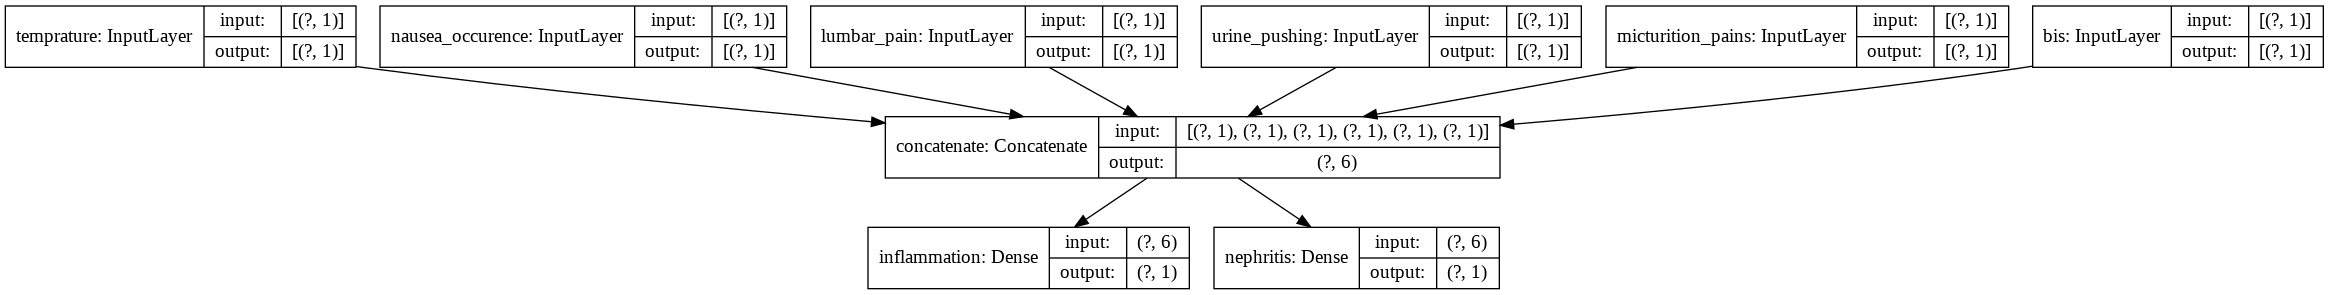

In [15]:
# plot the model
tf.keras.utils.plot_model(model,"model.png",show_layer_names=True,show_shapes=True)

#### we can specify compile inputs in a different ways


1.   Dictionary based definition 
2.   List based definition tem



In [23]:
# compile model using  dictionary based definition

#loss functions using layer name
loss_dict = {"inflammation": "binary_crossentropy",
             "nephritis":"binary_crossentropy"}

#metrics for each output layer using layer name
metrics_dict = {"inflammation": ["acc"],
                "nephritis": ["acc"]}

#loss weights dictionary
lossweights_dict = {"inflammation": 1,
                "nephritis": 0.2}


In [17]:
# compile model using  list  based definition,list order is same as layers order

#loss functions orders same as output layer order
loss_dict = ["binary_crossentropy","binary_crossentropy"]

#metrics for each output layer in same order
metrics_dict = [["acc"], ["acc"]]

#loss weights dictionary
lossweights_dict = [1, 0.2]


In [24]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(1e-3),
              loss=loss_dict,
              metrics=metrics_dict,
              loss_weights=lossweights_dict)

#input list of input X data and input y data
history = model.fit(x=input_train_list,
          y=output_train_list,
          epochs=1000,batch_size=128,verbose=False)

In [25]:
history.history.keys()

dict_keys(['loss', 'inflammation_loss', 'nephritis_loss', 'inflammation_acc', 'nephritis_acc'])

In [26]:
def plot_history(history):

  acc_keys = [k for k in history.history.keys() if k in ('inflammation_acc', 'nephritis_acc')] 
  loss_keys = [k for k in history.history.keys() if not k in acc_keys]

  for k, v in history.history.items():
      if k in acc_keys:
          plt.figure(1)
          plt.plot(v)
      else:
          plt.figure(2)
          plt.plot(v)

  plt.figure(1)
  plt.title('Accuracy vs. epochs')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(acc_keys, loc='upper right')

  plt.figure(2)
  plt.title('Loss vs. epochs')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(loss_keys, loc='upper right')

  plt.show()

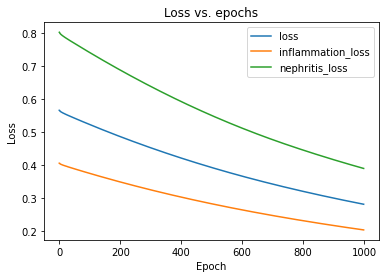

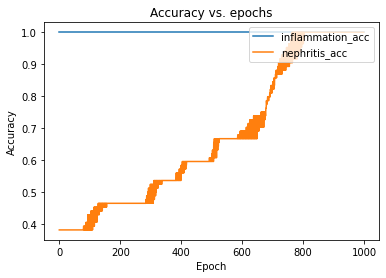

In [27]:
plot_history(history=history)

### Evaluate Model

In [28]:
model.evaluate(input_test_list,output_test_list)

2/2 [==============================] - 0s 3ms/step - loss: 0.2652 - inflammation_loss: 0.1865 - nephritis_loss: 0.3936 - inflammation_acc: 1.0000 - nephritis_acc: 1.0000


[0.2651781439781189, 0.1864512860774994, 0.3936343789100647, 1.0, 1.0]